# Hồi quy tuyến tính

## Đề bài

Xét một ví dụ đơn giản về dự đoán cân nặng theo chiều cao. Có thể thấy cân nặng thường tỉ lệ thuận với chiều cao, vì vậy hồi quy tuyến tính là mô hình phù hợp

## Import thư viện

In [6]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## Nhập dữ liệu

In [7]:
# Chiều cao
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
X

array([[147],
       [150],
       [153],
       [158],
       [163],
       [165],
       [168],
       [170],
       [173],
       [175],
       [178],
       [180],
       [183]])

In [8]:
# Cân nặng
y = np.array([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
y

array([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

## Trực quan hóa dữ liệu

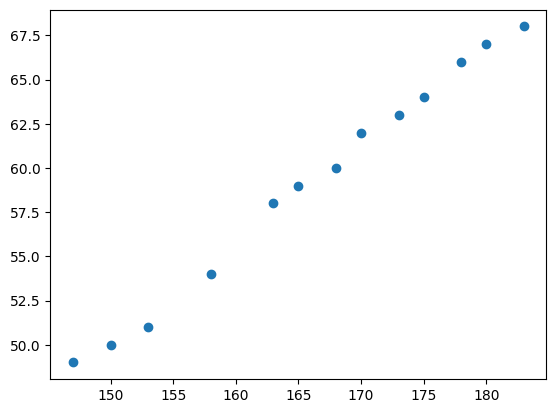

In [9]:
plt.scatter(X, y)

## Nghiệm tính theo công thức

$w = (A^T A)^{-1} (A^T y)$. Trong đó A là ma trận hàng các điểm dữ liệu đã được thêm đặc trưng $x0 = 1$

In [13]:
one = np.ones((X.shape[0], 1))
X_bar = np.concatenate((one, X), axis = 1)
X_bar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [16]:
A = np.dot(X_bar.T, X_bar)
b = np.dot(X_bar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w

array([-33.73541021,   0.55920496])

## Nghiệm tìm được bằng scikit-learn

In [19]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
print("sk-learn solution: w_1 = ", model.coef_[0], ", w_0 = ", model.intercept_)
print("our solution: w_1 = ", w[1], ", w_0 = ", w[0])

sk-learn solution: w_1 =  0.5592049619396674 , w_0 =  -33.73541020580774
our solution: w_1 =  0.5592049619395705 , w_0 =  -33.735410205790714


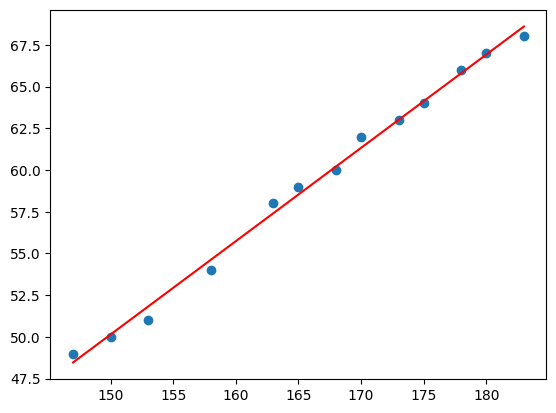

In [21]:
y_pred = model.predict(X)
plt.plot(X, y_pred, color = 'red')
plt.scatter(X, y)